<a href="https://colab.research.google.com/github/medzumi/iot_transport/blob/master/Pechorin_Data_City.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from numpy import linalg as ln
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
a = 4
b = 4
length = 1000
number = np.array([np.random.randint(100,400) for i in range(a*b)])

In [0]:
data = pd.DataFrame({'x':[], 'y':[], 'time':[], 'obj_id':[], 'v':[]})
idt = 0
for i in range(a):
    for j in range(b):
        c = np.random.uniform([i*length,j*length],[(i+1)*length,(j+1)*length],(number[i+j*b],2))
        data = data.append(pd.DataFrame({'v':np.zeros(number[i+j*b]),'x':c[:,0], 'y':c[:,1], 'time':np.zeros(number[i+j*b]), 'obj_id':[i for i in range(idt,idt+ number[i + j*b])]}), ignore_index = True)
        idt += number[i + j*b]

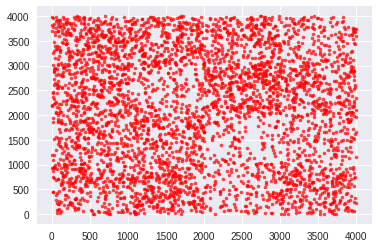

In [0]:
pl.scatter(data['x'][:], data['y'], c='red', s= 10, alpha = 0.7)

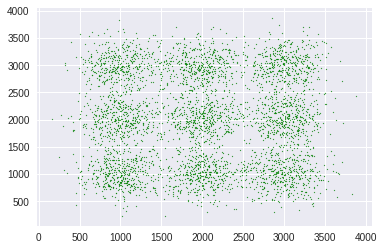

In [0]:
workplace = np.array([np.random.randint(100,300) for i in range(a*b)])
kod = int(idt/((a-1)*(b-1)))
knd = idt % ((a-1)*(b-1)) 
kgb_list = pd.DataFrame({'x_home':[], 'y_home':[], 'x_work':[], 'y_work':[], 'obj_id':[]})
scale = 250
helb = 0
gotowork = []
for i in range(1, a):
    for j in range(1, b):
        gotowork.append(np.random.normal([i*length, j*length], scale, (kod,2)))

goto = gotowork[0]
for i in range(1, len(gotowork)):
    goto = np.vstack((goto, gotowork[i]))
for i in range(knd):
    goto= np.vstack((goto, np.random.normal([length, length], scale, (1,2))))
    
kgb_list = kgb_list.append(pd.DataFrame({'x_home':data['x'][:], 'y_home':data['y'][:], 'x_work':goto[:,0], 'y_work':goto[:,1], 'obj_id':data['obj_id'][:]}), ignore_index = True)
kgb_list.to_csv('KGB_list.csv', sep = ',', encoding='utf-8',index=False)
pl.scatter(goto[:,0], goto[:,1], c= 'green', s =1, alpha=0.7)

In [0]:
j = 0
timeline_dif = 600
err = np.random.normal
cont = len(data['obj_id'].value_counts().index)
for i in data['obj_id'].value_counts().index:
    t_start = data['time'][data['obj_id'] == i].max()
    j += 1
    t = t_start
    const = np.random.randint(t+600, t+18000)
    const = int((const - t_start)/timeline_dif)
    sys.stdout.write("\rObject_id = {}".format(j/cont))
    data_par = pd.DataFrame({'x':[np.array(data['x'][(data['time'] == t_start) & (data['obj_id'] == i)])[0] + err(0, 1/6) for k in range(const)], 
                             'y':[np.array(data['y'][(data['time'] == t_start) & (data['obj_id'] == i)])[0] + err(0, 1/6) for k in range(const)], 
                             'time':[t_start + k*timeline_dif for k in range(1, const+1)],
                            'v':[err(0, 1/7) for k in range(const)],
                            'obj_id':[i for k in range(const)]})
    data = data.append(data_par, ignore_index = True)

Object_id = 1.0

In [0]:
j = 0
for i in data['obj_id'].value_counts().index:
    point_to = np.array(kgb_list[['x_work', 'y_work']][kgb_list['obj_id'] == i])[0]
    j +=1
    t_start = data['time'][data['obj_id'] == i].max()
    point_start = np.array(data[['x', 'y']][(data['obj_id'] == i) & (data['time'] == t_start)])[0]
    vector = (point_to - point_start)/6 #добираются по часу
    v = ln.norm(vector)
    data_par = np.array([[point_start[0]+k*vector[0], point_start[1] + k*vector[1], t_start + k*timeline_dif, v, i] for k in range(1, 7)])
    data = data.append(pd.DataFrame({'x' : data_par[:,0], 'y': data_par[:,1], 'time':data_par[:,2], 'v': data_par[:,3], 'obj_id': data_par[:,4]}), ignore_index = True)
    sys.stdout.write("\rObject_id = {}".format(j/cont))

Object_id = 1.0

In [0]:
j = 0
timeline_dif = 600
err = np.random.normal
cont = len(data['obj_id'].value_counts().index)
for i in data['obj_id'].value_counts().index:
    t_start = data['time'][data['obj_id'] == i].max()
    j += 1
    t = t_start
    const = np.random.randint(t+28800, t+36000)
    const = int((const - t_start)/timeline_dif)
    sys.stdout.write("\rObject_id = {}".format(j/cont))
    data_par = pd.DataFrame({'x':[np.array(data['x'][(data['time'] == t_start) & (data['obj_id'] == i)])[0] + err(0, 1/6) for k in range(const)], 
                             'y':[np.array(data['y'][(data['time'] == t_start) & (data['obj_id'] == i)])[0] + err(0, 1/6) for k in range(const)], 
                             'time':[t_start + k*timeline_dif for k in range(1, const+1)],
                            'v':[err(0, 1/7) for k in range(const)],
                            'obj_id':[i for k in range(const)]})
    data = data.append(data_par, ignore_index = True)

Object_id = 1.0

In [0]:
data[data['obj_id']==0]

,obj_id,time,v,x,y
0,0.0,0.0,0.000000,486.694053,650.292179
65958,0.0,600.0,0.055404,486.968901,650.374242
65959,0.0,1200.0,-0.012835,486.669279,650.301745
65960,0.0,1800.0,-0.088888,486.562038,650.220151
65961,0.0,2400.0,-0.077243,486.929947,650.303413
65962,0.0,3000.0,0.171687,486.780436,650.310782
65963,0.0,3600.0,0.098659,486.738642,650.612897
65964,0.0,4200.0,0.058295,486.587116,650.346207
65965,0.0,4800.0,0.030148,486.643964,650.390234
65966,0.0,5400.0,-0.186551,486.704829,650.200035


In [0]:
j = 0
for i in data['obj_id'].value_counts().index:
    point_to = np.array(kgb_list[['x_home', 'y_home']][kgb_list['obj_id'] == i])[0]
    j +=1
    t_start = data['time'][data['obj_id'] == i].max()
    point_start = np.array(data[['x', 'y']][(data['obj_id'] == i) & (data['time'] == t_start)])[0]
    vector = (point_to - point_start)/6 #добираются по часу
    v = ln.norm(vector)
    data_par = np.array([[point_start[0]+k*vector[0], point_start[1] + k*vector[1], t_start + k*timeline_dif, v, i] for k in range(1, 7)])
    data = data.append(pd.DataFrame({'x' : data_par[:,0], 'y': data_par[:,1], 'time':data_par[:,2], 'v': data_par[:,3], 'obj_id': data_par[:,4]}), ignore_index = True)
    sys.stdout.write("\rObject_id = {}".format(j/cont))

Object_id = 1.0

In [13]:
j = 0
timeline_dif = 600
err = np.random.normal
cont = len(data['obj_id'].value_counts().index)
for i in data['obj_id'].value_counts().index:
    t_start = data['time'][data['obj_id'] == i].max()
    j += 1
    t = t_start
    const = 84600
    const = int((const - t_start)/timeline_dif)
    sys.stdout.write("\rObject_id = {}".format(j/cont))
    data_par = pd.DataFrame({'x':[np.array(data['x'][(data['time'] == t_start) & (data['obj_id'] == i)])[0] + err(0, 1/6) for k in range(const)], 
                             'y':[np.array(data['y'][(data['time'] == t_start) & (data['obj_id'] == i)])[0] + err(0, 1/6) for k in range(const)], 
                             'time':[t_start + k*timeline_dif for k in range(1, const+1)],
                            'v':[err(0, 1/7) for k in range(const)],
                            'obj_id':[i for k in range(const)]})
    data = data.append(data_par, ignore_index = True)

Object_id = 1.0

In [0]:
data.to_csv('dataV4.csv', sep=',', encoding = 'utf-8')